**Importing Libraries**

In [4]:
import pandas as pd
import numpy as np

**Loading Dataset**

In [5]:
dataset = pd.read_csv('Assignment_3_dataset.csv')
dataset.Month = pd.to_datetime(dataset.Month)
dataset.head()

,Month,#Products_Sold
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


**Test-Train Split**

In [6]:
train = []
test = []
for i in range(0,144):
  if(str(dataset["Month"][i]).split('-')[0] == '1960'):
    test.append(dataset["#Products_Sold"][i])
  else:
    train.append(dataset["#Products_Sold"][i])
train = np.array(train, dtype="float32")
test = np.array(test, dtype="float32")

# ARIMA

**Data Visualization**

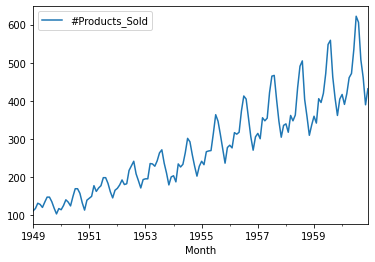

In [7]:
from matplotlib import pyplot
dataset.plot(x='Month')
pyplot.show()

**Autocorrelation**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


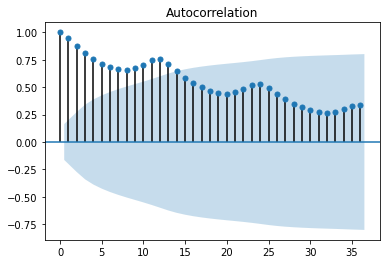

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(x = dataset["#Products_Sold"], lags = 36)

plt.show()

## Differencing

### 1st Order

**1st Order Differencing**

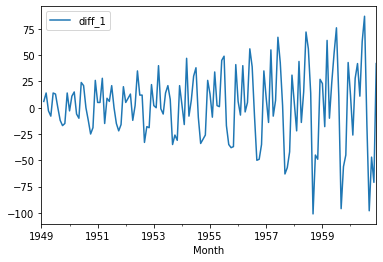

In [9]:
dataset['diff_1'] = dataset['#Products_Sold'].diff()
dataset.plot(x='Month', y = "diff_1")
pyplot.show()

### 2nd Order

**2nd Order Differencing**

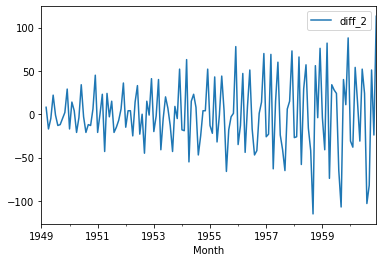

In [11]:
dataset['diff_2'] = np.append([np.nan] * 2, np.diff(dataset['#Products_Sold'], n=2))
dataset.plot(x='Month', y = "diff_2")
pyplot.show()

### ARIMA

In [14]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -636.795
Method:                           css   S.D. of innovations             31.252
Date:                Sun, 22 May 2022   AIC                           1277.589
Time:                        10:25:47   BIC                           1283.340
Sample:                             1   HQIC                          1279.926
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2366      2.731      0.819      0.414      -3.115       7.588


**Applying on Training Data and plotting actual and predicted values**

Train RMSE: 2.237


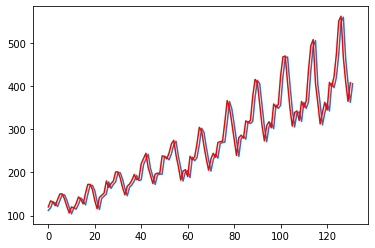

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_x = train[1:]
train_predictions = model_fit.predict(start = 2, end = 132, typ = "levels")
rmse = sqrt(mean_squared_error(train_x, train_predictions))
print('Train RMSE: %.3f' % rmse)
pyplot.plot(train)
pyplot.plot(train_predictions, color='red')
pyplot.show()

### ARIMA on Testing Dataset Using Hypertuned Parameters

Test RMSE: 37.131


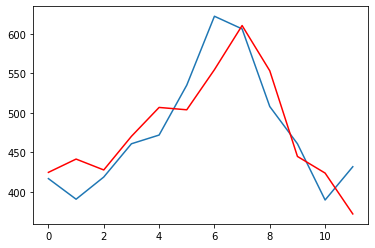

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = list()
history = [x for x in train]
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,3))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Neural Network

**Function to convert data based on window size**

In [18]:
def neural(length, window):
  Train_data = []
  Train_labels = []
  for i in range (0, length - window):
    Single = []
    for j in range (i, i + window):
      Single.append(train[j])
    Train_data.append(Single)
    Train_labels.append(train [ i + window ])
  return Train_data, Train_labels

**Plotting actual vs predicted for training data**

RMSE: 41.05926982543848


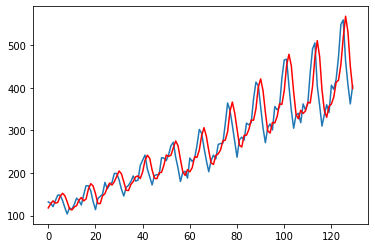

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neural_network import MLPRegressor
Train_data, Train_labels = neural(len(train),2)
regr = MLPRegressor(random_state=1).fit(Train_data, Train_labels)
neural_train_predictions = regr.predict(Train_data)
rmse = sqrt(mean_squared_error(Train_labels, neural_train_predictions))
print("RMSE:", rmse)

pyplot.plot(Train_labels)
pyplot.plot(neural_train_predictions, color='red')
pyplot.show()

**Plotting actual vs predicted for testing data**

RMSE: 78.13094161945418


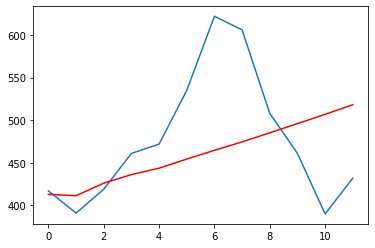

In [68]:
Train_data, Train_labels = neural(len(train),3)
regr = MLPRegressor(random_state=1).fit(Train_data, Train_labels)
neural_train_predictions_2 = []
Single_row = []
Single_row.append(Train_data[len(Train_data)-1].copy())
Single_row[0].pop(0)
Single_row[0].append(Train_labels[len(Train_data)-1])
for j in range (0, 12):
  pred_value = regr.predict(Single_row)
  Single_row[0].pop(0)
  Single_row[0].append(pred_value[0])
  neural_train_predictions_2.append(pred_value[0])
rmse = sqrt(mean_squared_error(test, neural_train_predictions_2))
print("RMSE:", rmse)
pyplot.plot(test)
pyplot.plot(neural_train_predictions_2, color='red')
pyplot.show()